<a href="https://colab.research.google.com/github/jolurf/Coursera/blob/main/jolurf/Coursera/bioinformatica/bioinfo_estatistica_lista_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


#Questão 1
Um Marcador molecular dialélico, com os genótipos qq, qQ e QQ, está associado com
um fenótipo sob estudo, tal que os seguintes dados foram obtidos:

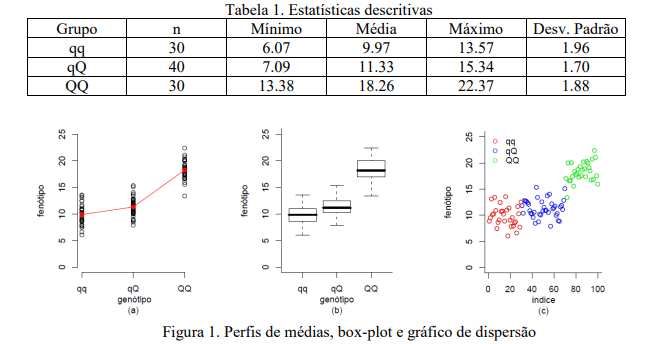

In [ ]:
ns= np.array([30,40,30])
mu= np.array([9.97,11.33,18.26])
sd_= np.array([1.96,1.7,1.88])
mins = [6.07,7.09,13.38]
maxs = [13.57,15.34,22.37]

1a) Para cada grupo genotípico, obtenha o Intervalo de Concentração dos dados fenotípicos.
Faça suposições necessárias. Comente os resultados à luz dos dados mostrados na Figura 1

In [ ]:
def ic(mu,sd):
  return(mu-2*sd,mu+2*sd)
## Intervalo de concentração conforme definido na aula

print('qq:',ic(9.97,1.96))
print('Qq:',ic(11.33,1.7))
print('QQ:',ic(18.26,1.88))

qq: (6.050000000000001, 13.89)
Qq: (7.93, 14.73)
QQ: (14.500000000000002, 22.020000000000003)


Observa-se que provavelmente há uma diferença nos intervalos de concentração

1b)Para cada grupo genotípico, obtenha o Intervalo de 95% de Confiança para a média
fenotípica. Faça suposições necessárias. Há indicação de efeito do marcador sobre o
fenótipo? Comente os resultados à luz dos dados mostrados na Figura 1.

In [ ]:
def ic_95(mu,sd,n):
  val = stats.t.ppf(0.975,n-1)
  return(mu-val*sd/np.sqrt(n),mu+val*sd/np.sqrt(n))

print('qq:',ic_95(9.97,1.96,30))
print('Qq:',ic_95(11.33,1.7,40))
print('QQ:',ic_95(18.26,1.88,30))

qq: (9.238123971954124, 10.701876028045877)
Qq: (10.786313623662098, 11.873686376337902)
QQ: (17.557996462894774, 18.96200353710523)


In [ ]:
for sd, n in zip(sd_,ns):
  print(sd/np.sqrt(n))

0.3578454042367085
0.2687936011143122
0.34323946936990407


Há indicação de efeito do marcador sobre o fenótipo, afinal qq e QQ não apresentam intersecção dos intervalos de 95% de confiança.

c) Formule um modelo estatístico de Análise de Variância desses dados. Faça suposições
necessárias. Preencha a Tabela 2. Interprete os resultados obtidos. Há evidência de efeito
significante desse Marcador sobre o fenótipo sob estudo?


Fórmulas

$$\bar{y} = \frac{\sum_{i=1}^a n_{a}\mu_a}{\sum_{i=1}^a n_{a}}$$

Para resíduos:
Quadratic Mean Residuals<br>
$$SQR = \frac{\sum_{i=1}^a (n_i -1)\sigma_i^2}{n-a}$$

Para dentro do grupo<br>
$$SQT = \frac{\sum_{i=1}^a n_i (\mu_i-\bar{y})^2}{a-1}$$

Para a estatística F
$$F = \frac{SQT}{SQR}$$

In [ ]:
def anova_tab(ns,mu,sd_):
  y_bar = sum(ns*mu)/sum(ns) # a média final é a média ponderada dos clusters sum_i ^ k (n_i*mu_i)/sum(n_i)
  a = len(ns)
  n = np.sum(ns)
  sqt = np.sum(ns*(mu-y_bar)**2)/(a-1)
  sqr = np.sum((ns-1)*(sd_**2))/(n-a)
  f = sqt/sqr
  return pd.DataFrame({"n.g.l":[a-1,n-a,n-1],'sum2':[(a-1)*sqt,(n-a)*sqr,(a-1)*sqt+(n-a)*sqr],"qm":[sqt,sqr,""],'est':[f,"",""],'p_value':[f'{stats.f.sf(f,a-1,n-a):.2}',"",""]})


anova_tab(ns,mu,sd_)

,n.g.l,sum2,qm,est,p_value
0,2,1217.0109,608.50545,180.717999,1.9e-33
1,97,326.6140,3.367155,,
2,99,1543.6249,,,


1d)Interprete as estimativas apresentadas na Tabela 3.
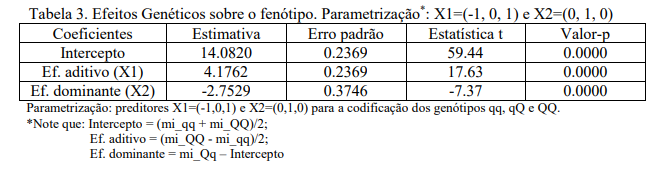

mi_qq = intercepto - efeito aditivo <br>
mi_QQ = intercepto + efeito aditivo <br>
mi_Qq = intercepto + efeito dominante<br>
Isto é, escreva $Y = \beta_0 + \beta_1 X_1 + \beta_2X2$, em que <br>
$\beta_0 = 14.0820$<br>
$\beta_1 = 4.1762$<br>
$\beta_2 = -2.7529$<br>
obtemos para os pares $(X_1,X_2)$:<br>
mi_qq = $(-1,0)$ <br>
mi_Qq = $(0,1)$ <br>
mi_QQ = $(1,0)$ <br>
Assim, esse modelo codifica homozigose como (-1,0,1) (efeito aditivo) e heterozigose como (0,1) (efeito dominante).<br>
Sendo a interpretação do coeficiente $\beta_2$ a ocorrência de heterozigose e do $\beta_1$ se há efeito de dominância (+1) ou de recessividade (-1) ambas em homozigose. Se heterozigose, X1 = 0.

e) O Delineamento Completamente Aleatorizado (DCA) pode ser adotado (direta ou indiretamente) neste tipo de estudo? Justifique.



O Delineamento Completamente Aleatorizado (DCA) pode ser adotado indiretamente neste tipo de estudo com base nas leis mendelianas. Isso ocorre porque, assumindo que a segregação dos alelos segue as leis de Mendel e que os cruzamentos ocorrem ao acaso, a distribuição dos genótipos (qq, qQ, QQ) na população ocorre de maneira aleatória, sem interferência de fatores externos.

Neste caso, os genótipos são determinados de forma análoga ao lançamento de uma moeda. Por exemplo, no cruzamento entre dois heterozigotos (qQ), a distribuição dos alelos segue a mesma probabilidade de obter dois resultados ao lançar duas moedas: a combinação dos alelos Q e q resulta nas distribuições QQ, qQ e qq com probabilidades previstas pelas leis de Mendel (1:2:1).

A aplicação do DCA nesse contexto é indireta, porque os genótipos são atribuídos pela natureza de maneira aleatória, similar à alocação de tratamentos em um experimento controlado. Isso evita vieses de seleção, garantindo que qualquer diferença fenotípica observada seja atribuída ao genótipo e não a fatores externos.

Caso existam interações ou desvios das expectativas mendelianas, seria possível modelar o sistema usando uma matriz de transição e simular o processo como um processo markoviano, onde as probabilidades de transição entre os estados dos genótipos são definidas pelas interações entre alelos.

f) Finalmente, gere dados de acordo com as informações da Tabela 1. Analise e conclua. Há efeito do marcador sobre a resposta fenotípica?

Há efeito.

In [ ]:
def simulate(mu,sd,n):
  return mu + sd*np.random.randn(n)

def simulate_event(mu,sd_,ns):
  qq = simulate(mu[0],sd_[0],ns[0])
  qQ = simulate(mu[1],sd_[1],ns[1])
  QQ = simulate(mu[2],sd_[2],ns[2])
  return {'qq':qq,'Qq':qQ,'QQ':QQ}


n_sims = 1000

sims = [simulate_event(mu,sd_,ns) for i in range(n_sims)]
## se der tempo, achar valores que são suficientemente pertos.



Para 1000 simulações, obtivemos 1000.0 em que o p <1e-08 


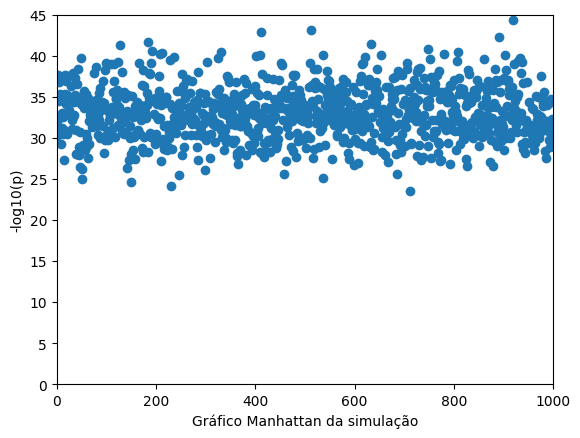

In [ ]:
def get_anova(sims_):
  anova_result =  stats.f_oneway(sims_['qq'], sims_['Qq'], sims_['QQ'])
  p_val = anova_result.pvalue
  f = anova_result.statistic
  return p_val, f


ps = []
fs = []
alfa = 1e-8
for sim in sims:
  p,f = get_anova(sim)
  ps += [p]
  fs += f

print(f"Para {n_sims} simulações, obtivemos {np.mean(np.array(ps)<alfa)*n_sims} em que o p <{alfa} ")
fig, ax = plt.subplots()
ax.scatter(np.arange(n_sims),-np.log10(ps))
ax.set_xlabel("Gráfico Manhattan da simulação")
ax.set_ylabel("-log10(p)")
ax.set_ylim([0,45])
ax.set_xlim([0,n_sims])
plt.show()

In [ ]:
def get_tukey(sim):
    obj = stats.tukey_hsd(sim['qq'],sim['Qq'],sim['QQ'])
    means =[]
    means += [obj.statistic[0,1]]
    means += [obj.statistic[0,2]]
    means += [obj.statistic[1,2]]
    p_vals = []
    p_vals += [obj.pvalue[0,1]]
    p_vals += [obj.pvalue[0,2]]
    p_vals += [obj.pvalue[1,2]]
    return means, p_vals

ps = [[],[],[]]
means = [[],[],[]]
alfa = 1e-8
for sim in sims:
  mean, p = get_tukey(sim)
  for i in range(len(mean)):
    means[i] += [mean[i]]
    ps[i] += [p[i]]

means = np.array(means)
ps = np.array(ps)




Em 1000 simulações, p_val do teste  tukey HSD para (0-1) foi menor do que 0.05 746 vezes


<ipython-input-58-742388399007>:6: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.arange(n_sims),-np.log10(ps[i,:]))


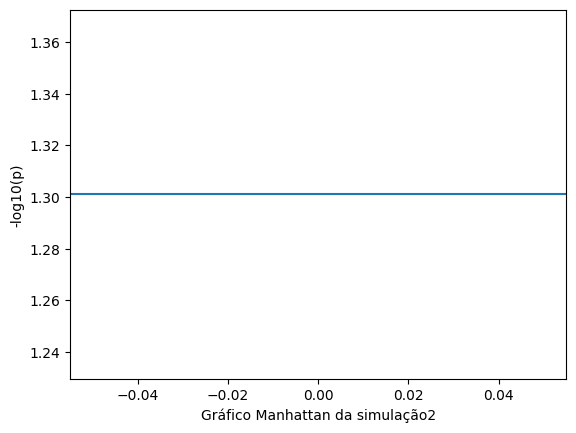

In [ ]:
alfa = 0.05
print(f'Em {len(sims)} simulações, p_val do teste  tukey HSD para (0-1) foi menor do que {alfa} {np.sum(ps[0,:]<alfa)} vezes')

fig, ax = plt.subplots(1)

ax.scatter(np.arange(n_sims),-np.log10(ps[i,:]))
ax.set_xlabel(f"Gráfico Manhattan da simulação{i}")
ax.set_ylabel("-log10(p)")
ax.axhline(y=-np.log10(0.05))

Questão 2
Dois marcadores moleculares, localizados no Loco 1 e Loco 2, estão associados com um
fenótipo, tal que os seguintes dados foram obtidos:

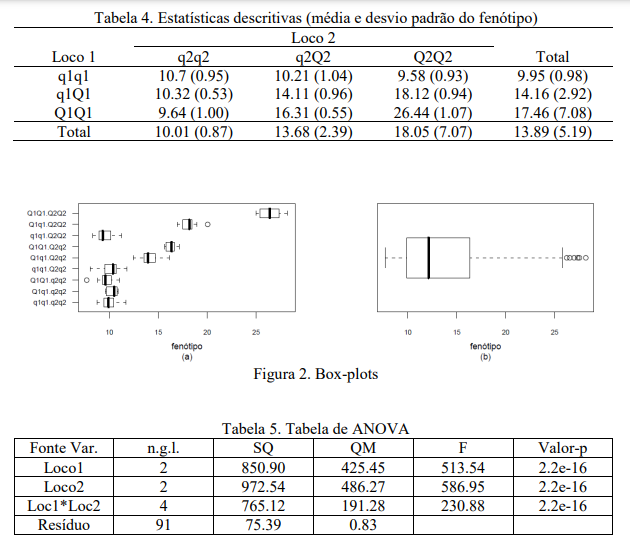

a) Construa o gráfico de perfis de médias do fenótipo de acordo com os dois locos. Há
indicação de efeito de interação entre os dois locos (marcadores)? Justifique.


<ipython-input-59-c9661e707f88>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  medias = df.applymap(lambda x: x[0])
<ipython-input-59-c9661e707f88>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  desvios = df.applymap(lambda x: x[1])


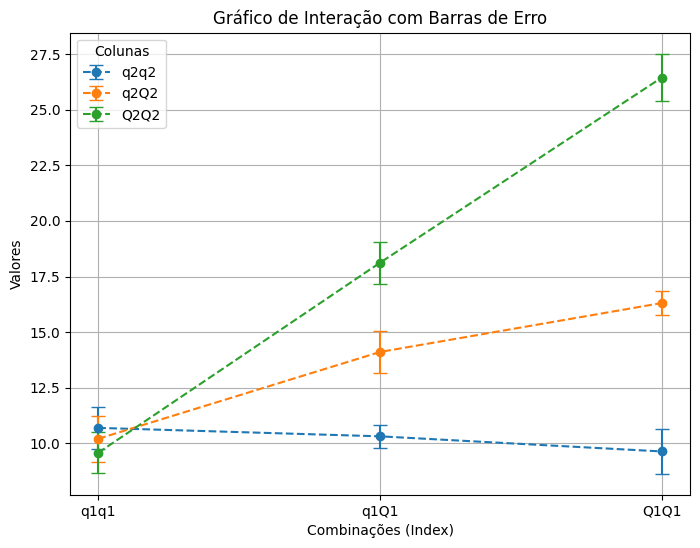

In [ ]:

# Dados (médias e desvios padrão)
data = {
    'q2q2': [(10.7, 0.95), (10.32, 0.53), (9.64, 1.00)],
    'q2Q2': [(10.21, 1.04), (14.11, 0.96), (16.31, 0.55)],
    'Q2Q2': [(9.58, 0.93), (18.12, 0.94), (26.44, 1.07)]
}
df = pd.DataFrame(data, index=['q1q1', 'q1Q1', 'Q1Q1'])

# Extraindo médias e desvios padrão
medias = df.applymap(lambda x: x[0])
desvios = df.applymap(lambda x: x[1])

# Plotando as médias com barras de erro (desvios padrão)
plt.figure(figsize=(8, 6))
for coluna in medias.columns:
    plt.errorbar(medias.index, medias[coluna], yerr=desvios[coluna],
                 marker='o', label=coluna, capsize=5,linestyle='--')

# Customizações
plt.title('Gráfico de Interação com Barras de Erro')
plt.xlabel('Combinações (Index)')
plt.ylabel('Valores')
plt.legend(title='Colunas')
plt.grid(True)

# Exibir o gráfico
plt.show()


Há indício de interação pois a inclinação dos segmentos de retas que unem as médias são diferentes quando fixados o efeito de algum dos genes.<br>
Vou escrever em modelo redundante para facilitar:
$Y_{ij} = \alpha_{i} + \beta_{j} + \gamma_{i,j} + e$ <br>
Se não há interação, \gamma_{i,j} = 0 para todo i e j. <br>
Não vou pesar muito a notação, mas vou mostrar com um exemplo: <br>
Seja $\widetilde{Y_{ij}} =  \alpha_{i} + \beta_{j} + \gamma_{i,j}$ e $i \neq k $,
$\widetilde{Y_{i,3}} - \widetilde{Y_{i,2}} = \beta_3 - \beta_2 + \gamma_{i,3}-\gamma_{1,2} = \beta_3-\beta_2 = \widetilde{Y_{k,3}} - \widetilde{Y_{k,2}}$
<br>
Isso implica que<br>
 Q1Q1Q2Q2 - Q1Q1Q2q2 = Q1q1Q2Q2 - Q1q1Q2q2, o que é falso visualmente.<br>
 <br>
 **Em outras palavras, se não houvesse interação as retas seriam paralelas.**



b) Há indicação de observações atípicas (outliers) nesses dados? Se há, essas observações
são de qual grupo genotípico? Qual é o critério de observações atípicas adotado no boxplot?

Há indicação de outlier nesses dados. <br>
Não entendi muito bem a segunda parte da questão, então responderei as duas interpretações que tive:<br><br>
Interpretação 1: Os grupos genotípicos Q1q1Q2Q2 e Q1Q1q2q2 apresentam indícios de outlier, observando o boxplot 1<br>
Interpretação 2: o boxplot2 apresenta indício de outlier, mas esse provavelmente ocorre devido ao fato de terem sumarizado todos os dados sem levar em conta o fenótipo,o que nos faria suspeitar do grupo Q1Q1Q2Q2 - por ele apresentar maiores fenótipos, fugindo do comportamento médio. Mas uma vez controlado o efeito, não há motivos para suspeitar de outlier dentro do grupo. Isto é, os dados do grupo duplo homozigoto dominante se destacam do comportamento dos outros fenótipos, mas os dados são internamento coerentes entre si uma vez analisados no grupo. <br><br>
O critério de observações atípicas adotado pelo boxplot é se está acima do Q3 + 1.5 * IQ e Q1-1.5IQ. Assumindo normalidade:

In [ ]:
q3 = stats.norm.ppf(0.75)
q1 = stats.norm.ppf(0.25)
iq = q3 - q1
print(f"Q3: {q3}, Q1: {q1}, IQ: {iq}")
print(stats.norm.cdf(q3+1.5*iq))
print(stats.norm.cdf(q1-1.5*iq))

Q3: 0.6744897501960817, Q1: -0.6744897501960817, IQ: 1.3489795003921634
0.9965116983803599
0.0034883016196401184


Isto é, se está no 0.35% superior da distribuição ou inferior.

c) A Tabela 5 apresenta os resultados do ajuste de um modelo de análise de variância
para estudar o efeito destes marcadores (locos 1 e 2) no fenótipo sob estudo. Interprete os
resultados. Como pode ser interpretado os 2 graus de liberdade do efeito de cada marcador?
Graficamente, como interpretar o efeito de interação neste caso?

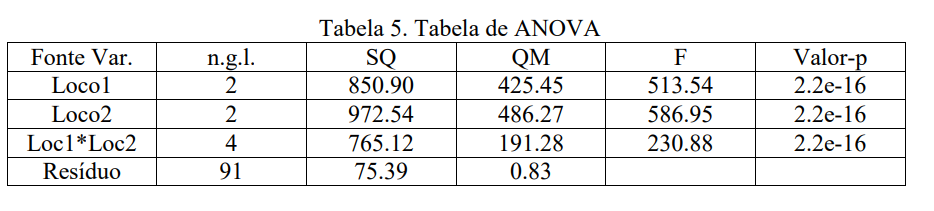

Os resultados mostram que há interação entre os locos 1 e 2 (com p valor da ordem de $10^{-16}$. E que o loco 1 e loco 2 apresentam efeito sobre o fenótipo, com p valor também da ordem de $10^{-16}$. Isto permite rejeitar a hipótese nula de ausência de efeito.


Os dois graus de liberdade de cada marcador podem ser interpretados das seguintes formas:<br>
**Matemática**
aditivos - número de níveis dentro daquele fatores  - 1 para efeitos aditivos em cada; <br>
interação -  (p-1)(q-1) <br>

**Interpretação em modelo de regressão** <br>
Graus de liberdade podem ser vistos como o número mínimo de coeficientes necessários para o modelo cobrir os efeitos dos parâmetros analizados. Isto é, evitar redundância.<br><br>
 (Exemplo: $Y = \sum_{i=1}^3\mu_i X_i $ para $i \in \{1,2,3\}$ é equivalente a $Y = \tau + \sum_{i=1}^2 \widetilde{\mu_i}X_i$ para $i \in \{1,2\}$)<br> <br>
 Essa equivalência decorre de escrever $\tau = \mu_3$ e $\widetilde{\mu_i}= \mu_i - \mu_3 $. Sendo que $X_i$ = 1 implica que os outros valores são 0.<br>
 <br>
Para modelos com mais variáveis e interação também pode ser feito.

aditivos puros - graus de liberdade em um modelo sem interação
interação puros - graus de liberdade para um modelo com interação. (Inicialmente o modelo com interação teria p*q elementos, mas pode-se eliminar um como constante, sobrando (pq - 1), mas (p-1) e (q-1) já foram utilizados - equivalentes ao modelo aditivo- sobrando (pq - 1 - (p-1) - (q-1)) = (p-1)(q-1) de interação pura. <br><br>
O raciocínio se expande para mais fatores, notando-se também que um modelo com 3 fatores e interações apenas 2 a 2 é um submodelo do de interações triplas. Assim sucessivamente.<br>




d) A Tabela 6 apresenta as estimativas do efeito aditivo dos dois marcadores (Loco 1 e
Loco 2) bem como de sua interação (aditivo*aditivo). Com base nestas estimativas, qual é o
valor esperado do fenótipo para um indivíduo com genótipo (q1q1q2q2)? E para genótipo
(q1q1q2Q2)? Considere a categorização dos genótipos indicada no rodapé da Tabela 6.

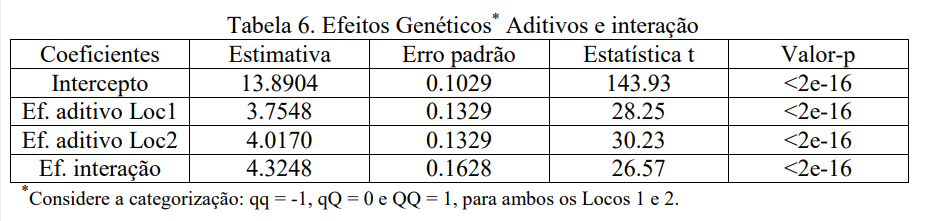

$ \widetilde{Y} = intercepto + Loc1*X1 + Loc2*X2 + Int*X1*X2$

In [ ]:
def get_val(q1q1,q2q2):
  return 13.8904 + 3.7548*q1q1 + 4.0170*q2q2 + 4.3248*q1q1*q2q2
print("q1q1q2q2 (duplo heterozigoto recessivo):",get_val(-1,-1))
print("q1q1q2Q2 (homozigoto recessivo + heterozigoto):",get_val(-1,0))

q1q1q2q2 (duplo heterozigoto recessivo): 10.4434
q1q1q2Q2 (homozigoto recessivo + heterozigoto): 10.1356


e) Finalmente, gere dados de acordo com as informações da Tabela 4. Defina, a seu
critério, os tamanhos amostrais. Analise os dados e conclua sobre o efeito desses
marcadores sobre a variável resposta (fenótipo).

#Questão 3
Dados de câncer de ovário foram simulados a partir do projeto TCGA
(https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga).
No link (https://figshare.com/articles/Ovarian_cancer_profile_for_OmicsSIMLA/7763627)
é possível baixar os dados.
No link (https://omicssimla.sourceforge.io/simuomicsTCGA.html) há uma explicação do
que significa cada coluna de cada banco de dados.
São dados simulados: há 50 réplicas dos mesmos dados (em *.batch1 estão as réplicas de
01 a 15; em *.batch2 estão as restantes, de16 a 50). Detalhes sobre o simulador de dados
usado estão em Chung e Kang (2019). Para as mesmas unidades amostrais, estão
disponíveis informações de 4 bancos de dados: CNV (Copy Number Variation), Metilação,
Expressão Gênica (dados originais e normalizados) e Proteína. As unidades amostrais
correspondem a pacientes com tempo de sobrevida inferior a 3 anos (casos – outcome = 1)
e superior a 3 anos (controle – outcome = 0). Os dados foram gerados supondo a presença
de uma região cromossômica (eQTM) com nível de metilação diferente para casos e
controles, a qual influencia os genes LRIG1,TCEAL8 e MARCH9 (Figura 4, abaixo,
extraída do artigo de Chung e Kang, 2019). A simulação dos casos e controles foi feita
condicionalmente à expressão gênica destes três genes e do LRRN4. Foram simulados
dados para 1000 pacientes (amostras balanceadas, sendo 500 casos e 500 controles).

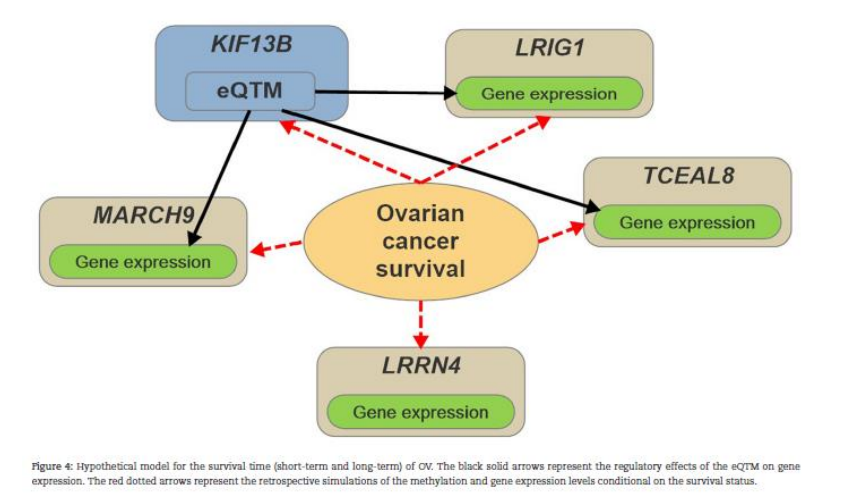

A seguinte notação foi adotada nos bancos de dados:
 CNV: informação de CNV para 2884 regiões. As variáveis estão codificadas como -2, -1, 0, 1
e 2. Os valores negativos indicam a perda de duas ou uma cópia da região cromossômica,
os valores positivos indicam o ganho de duas ou de uma cópia, e o valor nulo indica que a
região cromossômica é normal.<br>
 Exp: informação da intensidade de expressão gênica dos genes LRIG1, TCEAL8, MARCH9,
LRRN4 e 2000 outros.<br>
 NorExp: dados da intensidade de expressão gênica normalizados, em que foram
eliminados ruídos aleatórios.<br>
 Methy: dados de metilação de 2752 locais cromossômicos, além do eQTM. Os dados
indicam o percentual de metilação em cada local.<br>
 Protein: valores da expressão proteica normalizada para os mesmos genes considerados
nos dados de expressão gênica. <br>
Referência: Ren Hua Chung and Chen Yu Kang. A multi-omics data simulator for
complex disease studies and its application to evaluate multi-omics data analysis methods
for disease classification. Giga Science 8(5): 1–12, 2019. ISSN 2047217X. doi:
10.1093/gigascience/giz045.

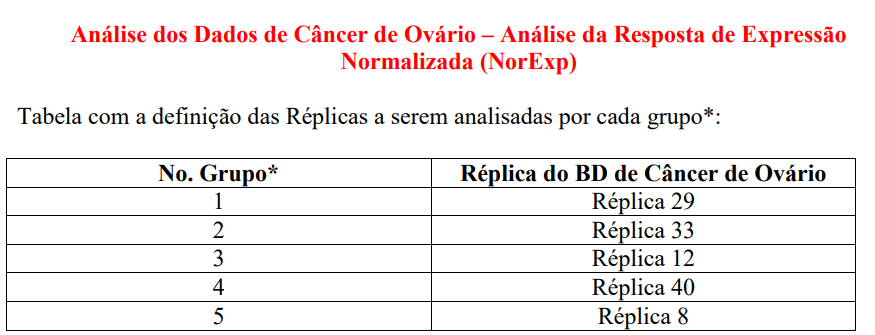

a) Além dos genes LRIG1, TCEAL8, MARCH9 e LRRN4, escolha uma dentre as 2000
variáveis de expressão gênica, obtenha as estatísticas descritivas e construa os
correspondentes boxplots dos dados de acordo com os grupos caso e controle. Há indicação
de expressão diferencial entre casos e controles para estes 5 “genes”?

In [ ]:
df_nor = pd.read_csv("/content/sim40.nor_exp",sep=" ")
# df_exp = pd.read_csv("/content/sim40.exp",sep=" ")
df = df_nor
print(df.head())
print(df.columns)
# df = df.loc[:,[ 'FAM','IID', 'FID','MID','SEX','AFF','DE', 'eQTM_DE', 'eQTM_DE.1',
#        'eQTM_DE.2',"EE.11991"]]
# print(df.head())


           FAM  IID  FID  MID  SEX       AFF       DE   eQTM_DE  eQTM_DE.1  \
DCASES20     1    0    0    1    2  2.663390 -1.34009 -1.762410  -0.672252   
DCASES33     1    0    0    2    2  0.474384 -1.86177 -1.370610  -1.263400   
DCASES43     1    0    0    2    2  0.292540 -1.84969 -1.657610  -0.120249   
DCASES112    1    0    0    1    2  0.359437 -1.87245 -0.063032  -2.095760   
DCASES123    1    0    0    2    2  0.855260 -1.87050  0.144212  -1.930370   

           eQTM_DE.2  ...  EE.11990  EE.11991  EE.11992  EE.11993  EE.11994  \
DCASES20   -0.577775  ... -1.036760  0.544658  1.560570 -0.298322  1.748510   
DCASES33   -1.335730  ...  0.002380 -0.481245  0.633662 -0.370012 -0.758338   
DCASES43   -0.445238  ... -0.686716 -0.260192 -1.052070 -0.411840 -0.440717   
DCASES112  -0.784027  ... -0.930048  0.119448 -0.395364 -0.593671 -0.892995   
DCASES123  -0.105983  ...  3.795960  0.240018 -1.210780  0.581054  0.377331   

           EE.11995  EE.11996  EE.11997  EE.11998  EE.11

In [ ]:
df["interv"] = df.index.str.contains("CASES")
genes = ['DE', 'eQTM_DE', 'eQTM_DE.1',
       'eQTM_DE.2',"EE"]
df = df.loc[:,["interv"]+genes]

b) Para estes 5 “genes”, compare as médias das respostas de expressão (Expr) de acordo
com os grupos caso e controle. Use, por exemplo, testes t ou de Wilcoxon. Apresente os
resultados e interprete o efeito destes “genes”.

TtestResult(statistic=-1.9527809354943506, pvalue=0.057082106207008786, df=45.0)

In [ ]:
grupo_interv = df.loc[df['interv'] == True,:]
grupo_controle = df.loc[df['interv'] == False,:]
grupo_interv

,FAM,IID,FID,MID,SEX,AFF,DE,eQTM_DE,eQTM_DE.1,eQTM_DE.2,...,EE.11991,EE.11992,EE.11993,EE.11994,EE.11995,EE.11996,EE.11997,EE.11998,EE.11999,interv
DCASES20,1,0,0,1,2,2.663390,-1.340090,-1.762410,-0.672252,-0.577775,...,0.544658,1.560570,-0.298322,1.748510,-0.682949,0.006689,1.327820,1.384990,NaN,True
DCASES33,1,0,0,2,2,0.474384,-1.861770,-1.370610,-1.263400,-1.335730,...,-0.481245,0.633662,-0.370012,-0.758338,-0.000223,-0.594831,0.773659,-0.925323,NaN,True
DCASES43,1,0,0,2,2,0.292540,-1.849690,-1.657610,-0.120249,-0.445238,...,-0.260192,-1.052070,-0.411840,-0.440717,-0.166139,0.031180,-0.578997,0.566657,NaN,True
DCASES112,1,0,0,1,2,0.359437,-1.872450,-0.063032,-2.095760,-0.784027,...,0.119448,-0.395364,-0.593671,-0.892995,-0.566505,-0.604854,0.374614,0.939243,NaN,True
DCASES123,1,0,0,2,2,0.855260,-1.870500,0.144212,-1.930370,-0.105983,...,0.240018,-1.210780,0.581054,0.377331,1.725580,-0.329641,-0.470071,0.772792,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DCASES432,1,0,0,1,2,0.860214,-1.150820,-1.809210,-1.954900,-0.709181,...,-0.664508,0.063158,-0.644651,0.059852,0.917118,-0.484038,3.066890,-0.628543,NaN,True
DCASES448,1,0,0,1,2,0.481587,1.302840,-0.655405,0.439217,0.608081,...,-1.089560,-0.565789,-0.960638,-0.897528,1.824670,0.406727,-0.846289,-1.226240,NaN,True
DCASES460,1,0,0,1,2,4.075390,3.148150,0.499284,0.332986,2.204970,...,-1.818700,0.629186,-0.210276,-0.850135,-0.472629,-0.701316,-0.766771,0.058199,NaN,True
DCASES491,1,0,0,2,2,1.197580,0.885023,1.636320,1.504090,1.664900,...,-1.468690,-0.017194,0.102203,-1.231400,1.286540,-0.761210,0.634915,-0.833561,NaN,True


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, wilcoxon

# Suponha que seu DataFrame já esteja carregado em df
# df = pd.read_csv('seu_arquivo.csv')  # Substitua com o caminho do seu arquivo de dados

# Lista dos genes/variáveis a serem comparadas

# Realizar os testes t de Student e Wilcoxon para cada variável
resultados = {}

for gene in genes:
    # Teste t de Student (assume distribuição normal)
    t_stat, p_val_ttest = ttest_ind(grupo_interv[gene], grupo_controle[gene], nan_policy='omit',equal_var=False)

    # Teste de Wilcoxon (não paramétrico, se houver mais de 20 pontos em cada grupo)
    try:
        _, p_val_wilcoxon = wilcoxon(grupo_interv[gene], grupo_controle[gene], nan_policy='omit')
    except ValueError as e:
        p_val_wilcoxon = None  # O teste de Wilcoxon pode falhar se os dados forem insuficientes

    # Guardar os resultados
    resultados[gene] = {
        'p-valor (t-test)': p_val_ttest,
        'p-valor (Wilcoxon)': p_val_wilcoxon
    }

# Mostrar os resultados
resultados_df = pd.DataFrame(resultados).T
print(resultados_df)


           p-valor (t-test)  p-valor (Wilcoxon)
DE             7.385511e-12        1.014812e-11
eQTM_DE        3.793974e-09        6.533927e-08
eQTM_DE.1      1.169927e-11        2.717015e-11
eQTM_DE.2      6.684298e-01        5.442662e-01
EE             8.615596e-01        9.314615e-01


c) Considerando todos os 2004 “genes”, construa um gráfico vulcão e um gráfico
Manhattan para representar os resultados dos testes de comparação das médias de
expressão (Expr) de acordo com os grupos caso e controle (testes t ou de Wilcoxon). Há
evidência de “genes” com expressão diferencial significante entre os grupos? Justifique.
Adote algum tipo de correção para múltiplos testes.
Gráfico vulcão é um gráfico de dispersão da estimativa da diferença entre as médias da
resposta entre casos e controle, no eixo das abscissas, pela significância dessa
diferença na escala –log10(valor p), no eixo das ordenadas.
Gráfico Manhattan é um gráfico de dispersão, com -log10(valor p), na ordenada, versus o
índice do fragmento (de 1 a 2004), na abscissa.

In [ ]:
df = pd.read_csv("/content/sim40.nor_exp",sep=" ")
df["interv"] = df.index.str.contains("CASES")


In [ ]:
genes = df.columns[6:-2]

# # Filtrar os dados em dois grupos: "interv == True" e "interv == False"
grupo_interv = df[df['interv'] == True]
grupo_controle = df[df['interv'] == False]

# # Realizar os testes t de Student e Wilcoxon para cada variável


for gene in genes:
#     # Teste t de Student (assume distribuição normal)
    t_stat, p_val_ttest = ttest_ind(grupo_interv[gene], grupo_controle[gene], nan_policy='omit')

    # Teste de Wilcoxon (não paramétrico, se houver mais de 20 pontos em cada grupo)
    try:
        _, p_val_wilcoxon = wilcoxon(grupo_interv[gene], grupo_controle[gene], nan_policy='omit')
    except ValueError as e:
        p_val_wilcoxon = None  # O teste de Wilcoxon pode falhar se os dados forem insuficientes

    # Guardar os resultados
    resultados[gene] = {
        'dif (t-test)':t_stat,
        'p-valor (t-test)': p_val_ttest,
        'p-valor (Wilcoxon)': p_val_wilcoxon
    }



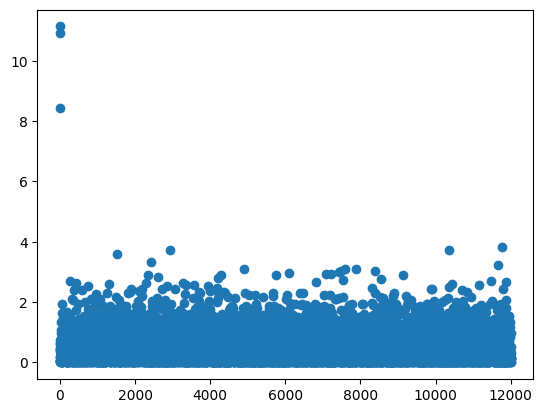

In [ ]:
p_vals = []
for gene in genes:
  try:
    p_vals += [resultados[gene]['p-valor (t-test)']]
  except:
    p_vals += [1]

p_vals = np.array(p_vals)
plt.scatter(np.arange(len(p_vals)),-np.log10(p_vals))


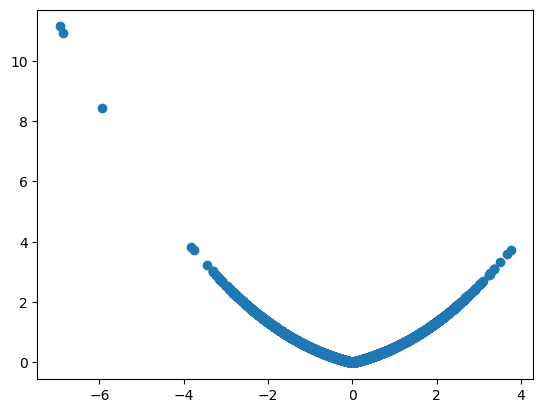

In [ ]:
t_vals = []
for gene in genes:
  try:
    t_vals += [resultados[gene]['dif (t-test)']]
  except:
    t_vals += [np.inf]

t_vals = np.array(t_vals)
plt.scatter(t_vals,-np.log10(p_vals))
